<a href="https://colab.research.google.com/github/eftekhar-hossain/SKBI_Training/blob/main/Intermediate/Session_6_(word2vec).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center> <h1> <u> <font color='red'> Training on AI and ML with Python (Intermediate) </font> </u> </h1> </center>

In [ ]:
%%time
import os
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re
import nltk
import tensorflow as tf
from tensorflow import keras

CPU times: user 27 µs, sys: 0 ns, total: 27 µs
Wall time: 31.2 µs


## Fetching the Dataset
Now we will get the dataset form our google drive. A class array will be created which contains the name of the classes we are interested to work with.

In [ ]:
!wget -O news.csv https://www.dropbox.com/s/12yza2h4bja9fqy/News_12Class.csv?dl=0

In [ ]:
%%time
class_names = ['Accident', 'Art', 'Crime', 'Economics', 'Education', 'Entertainment',
               'Environment', 'International', 'Politics', 'Science_tech', 'Sports', 'Suspicious']
               
dataset = pd.read_csv("news.csv")
dataset

CPU times: user 5.73 s, sys: 632 ms, total: 6.36 s
Wall time: 6.33 s


In [ ]:
dataset.columns

Index(['Unnamed: 0', 'Text', 'Category'], dtype='object')

In [ ]:
labels = np.array(dataset['Category'])
print('Total size of the dataset : ',len(dataset))

Total size of the dataset :  95866


The total size of the dataset is 90996. We will build our word embedding model on this dataset

## Data Preprocessing
Here we will process the data by removing punctuation and stop words from the dataset. It is really a important part for the successful implementation of our word embedding model.

### Removing stop words and punctuation
I do not think when we are implementing words embedding there are any need of removing stop words. This effect our cause of interest a little. So there is not need to remove this stop words for this case. But a efficient way of removing stop words are shown below.

In [ ]:
%%time
total_words = set() ## list of all words in our dataset

def creating_total_words(words):
     for w in words:
          total_words.add(w)

processed_data = [] ##List of all the processed text

for i in range(len(dataset)):
    text = re.sub('[^\u0980-\u09FF]',' ', dataset['Text'][i]) ## removing punctions 
    ## removing stop words from the texts
    words =text.split()
    creating_total_words(words)
    processed_data.append(words)

CPU times: user 15.9 s, sys: 1.25 s, total: 17.2 s
Wall time: 17.6 s


Here exists a special trick that inceease the total runtime of the system. So this code is removed and executed separately

In [ ]:
# vocabulary = list(total_words)
# for w in vocabulary:
#     if w in set(Stopwords_bng.words):
#       vocabulary.remove(w)


In [ ]:
# Finding the size of the vocabulary
print(len(total_words))
# Size of vocabulary after removing the stop words
#print(len(vocabulary))
#for w in total_words:
  #print(w)
##Look at the a fraction of the dataset after preprocessing

for i in range(10):
    print(dataset['Text'][i],'\n',processed_data[i],'\n\n')

429370
 নাটোরের বড়াইগ্রাম উপজেলায় মাটির দেয়াল চাপা পড়ে মা ও ছেলের মৃত্যু হয়েছে। সোমবার রাত ৮টার দিকে উপজেলার মেরিগাছা বাজারের পাশে জেলে পাড়ায় এ দুর্ঘটনা ঘটে বলে প্রত্যক্ষদর্শীরা জানিয়েছে। নিহতরা হলেন- রাজিয়া বেগম (৫৫) ও তার ছেলে হাবিবুর রহমান হবি (৩৫)। রাজিয়া বেগমের স্বামী নূর মোহাম্মদ বিডিনিউজ টোয়েন্টিফোর ডটকমকে জানান, রাতে মা ও ছেলে বাড়ির উঠানে বসে মাছ ধরার চাঁই তৈরি করছিলেন। এ সময় ঘরের পুরোনো মাটির দেয়াল ধসে তাদের ওপর পড়ে। "হাসপাতালে নেওয়ার পথে রাত ৯টার দিকে রাজিয়া মারা যান। রাত পৌনে ১০টার দিকে মারা যায় হাবিব।"  
 ['নাটোরের', 'বড়াইগ্রাম', 'উপজেলায়', 'মাটির', 'দেয়াল', 'চাপা', 'পড়ে', 'মা', 'ও', 'ছেলের', 'মৃত্যু', 'হয়েছে', 'সোমবার', 'রাত', '৮টার', 'দিকে', 'উপজেলার', 'মেরিগাছা', 'বাজারের', 'পাশে', 'জেলে', 'পাড়ায়', 'এ', 'দুর্ঘটনা', 'ঘটে', 'বলে', 'প্রত্যক্ষদর্শীরা', 'জানিয়েছে', 'নিহতরা', 'হলেন', 'রাজিয়া', 'বেগম', '৫৫', 'ও', 'তার', 'ছেলে', 'হাবিবুর', 'রহমান', 'হবি', '৩৫', 'রাজিয়া', 'বেগমের', 'স্বামী', 'নূর', 'মোহাম্মদ', 'বিডিনিউজ', 'টোয়েন্টিফোর', 'ডটকমকে', 'জানান', 'রাতে', 'মা', 'ও', 'ছেলে

### Finding Frequency Distribution of Data Length 

Here frequency of each length will be counted to find out which lenth size is more appropiate at the time of using pad sequences. we all plot this frequency in histogram to get a visual understanding.

In [ ]:
Length_frequency = {}

for i in range(len(dataset)):
     index = len(dataset["Text"][i])
     Length_frequency[index] = Length_frequency.get(index, 0)+1
      


j = 0
for i,v in Length_frequency.items():
  print(i,v,'\n')
  if j==10:
    break
  j+=1

513 37 

401 16 

1395 46 

1064 56 

1853 28 

688 51 

550 41 

466 25 

662 35 

819 52 

442 22 



Text(0.5, 1.0, 'Length-Frequency Distribution')

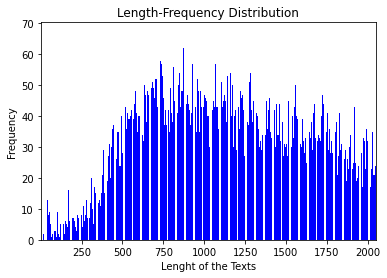

In [ ]:
import seaborn as sns

plt.bar(list(Length_frequency.keys()), Length_frequency.values(), color ='b')
plt.xlim(1, 2048)

plt.xlabel('Lenght of the Texts')
plt.ylabel('Frequency')
plt.title('Length-Frequency Distribution')

# Creating Word Embedding Model


## Defining the Model
Here we will define the model and necessary hyperparameters. Necessity of this hyperparameters will be briefly describe in the paper.

In [ ]:
%%time
from gensim.models import Word2Vec
#different hyperparameter that can be used to test the system 
#ensim.models.Word2Vec(size=300, window=5, min_count=1 workers=40,seed=1,cbow=0,sample=1e-4,hs=1,negative=5,iter=15)
word2vec = Word2Vec(processed_data, size=100,  min_count=5, window=5, workers=40, cbow_mean=0,seed=1, sample=1e-4, hs=1, negative=5, iter=1)

CPU times: user 2min 38s, sys: 895 ms, total: 2min 38s
Wall time: 1min 36s


In [ ]:
vocabulary = word2vec.wv.vocab
print(len(vocabulary))

123771


## Creating necessary List and Arrays
Create the necessary lists which will be used for further processing with our model.

In [ ]:
%%time

model = word2vec
vocabulary = model.wv.vocab
word_to_vec_map = {}
words_to_index = {}
index_to_words = {}
frequency_of_words = {}

c =1
for w in vocabulary:
  word_to_vec_map[w] = model[w]
  words_to_index[w] = c
  index_to_words[c] = w
  frequency_of_words[w] = vocabulary[w].count
  c = c+1

print(len(vocabulary))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()


123771
CPU times: user 539 ms, sys: 11 ms, total: 550 ms
Wall time: 551 ms


## Creating List of Check Words
Here we will create a list  through which we evaluate our model.

In [ ]:
check_words = []
for i in range(10):
  check_words.append(processed_data[i][10])

cc = pd.read_csv('check_words.txt')
check_words2 = []
for w in cc.words:
    if w in vocabulary:
      print(w)
      print(word_to_vec_map[w])
      check_words2.append(w)
print(check_words2)

করিম
[-7.9434192e-01 -2.9286855e-01 -3.3166942e-01  6.2602478e-01
 -1.3783178e-01  3.8270968e-01  2.2676398e-01  1.5395352e-01
 -4.2833984e-02  3.3314507e-02 -4.2610484e-01  8.5615544e-03
 -3.8844216e-01 -4.1423237e-01  1.3804965e-01  1.0733470e-01
 -3.4638178e-01 -4.9720486e-05 -3.7410101e-01 -6.8929002e-02
  1.8939941e-01  7.7513832e-01 -1.3755192e-01  6.0052644e-03
 -2.5406143e-02  2.7786404e-01  2.8891519e-02  3.1532869e-01
  7.7647336e-02  3.0923393e-01 -2.5153818e-02 -3.7138471e-01
  4.0381157e-01  1.7067917e-01 -4.0255386e-01  4.6060067e-01
 -1.4879836e-01 -4.1666445e-01  2.1722944e-01 -6.3280517e-01
  2.2239603e-01 -3.1398150e-01 -2.8936937e-01 -2.3062888e-01
 -8.3010450e-02  3.3564813e-02 -3.0436686e-01  7.9063088e-02
 -4.6665341e-01  2.8846332e-01  6.7828067e-02 -2.5425342e-01
 -2.3807187e-01 -9.5302828e-02  2.7180782e-02 -3.5589555e-01
  2.3593606e-01 -7.8888911e-01 -2.4786231e-01 -5.2086338e-02
 -5.7630175e-01  8.2319163e-02  5.0275862e-01  3.0028090e-02
 -5.2726400e-01  4.

## Finding most frequent words and similar words

In [ ]:
%%time

## Finding most frequent words within a frequency range
frequent_words = model.wv.index2entity[45:60]

## Finding the similar words of this frequent words
words_to_print = []
for w in check_words2:
  print('\n',w)
  words_to_print.append(w)
  similar_words = model.wv.most_similar(w, topn=10)
  for wr, vec in similar_words:
    words_to_print.append(wr)
    print(wr, vec)


 করিম
করিমকে 0.770182728767395
বারী 0.7294464111328125
করিমের 0.729069173336029
আজিম 0.6956832408905029
বাহার 0.686455488204956
তালুকদার 0.6859972476959229
কবীর 0.6843044757843018
হক 0.6829004883766174
হালিম 0.6794058084487915
করীম 0.6703448295593262

 ঢাকা
রাজশাহী 0.8973428606987
চট্টগ্রাম 0.8885113596916199
সিলেট 0.8660680055618286
খুলনা 0.8419204354286194
বরিশাল 0.8349708318710327
রংপুর 0.8256484270095825
কুমিল্লা 0.787453293800354
যশোর 0.7814102172851562
ময়মনসিংহ 0.7626311182975769
সিলেটের 0.7576984167098999

 কুকুর
লগে 0.8553169965744019
খোঁজে 0.8409215807914734
পোষা 0.8220635652542114
হাতির 0.8214366436004639
মরা 0.8210550546646118
উড়ে 0.8165916800498962
ছোট্ট 0.8138324022293091
জঙ্গলে 0.8108670115470886
কাপড় 0.8072777986526489
মাঝেমধ্যে 0.8049430251121521

 চুয়েট
রুয়েট 0.7458735108375549
রাবি 0.7072412967681885
বিশ্ববিদ্যালয় 0.704220712184906
চবি 0.6974164247512817
বুয়েট 0.687343418598175
বিশ্ববিদ্যালয় 0.6823685169219971
বিশ্ববিদ্যালয়ের 0.6792470216751099
শাবিপ্রবি 0.67071

## Installing Bangla Fonts
Here we will install bangla font to show bangla in TSNE plot.

In [ ]:
!wget -O Kalpurush.ttf https://www.dropbox.com/s/162f2fsxn38lh0r/Kalpurush.ttf?dl=0

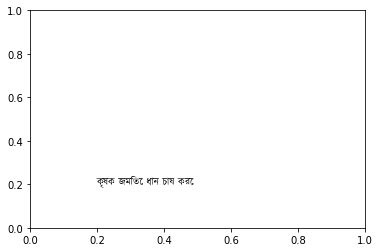

In [ ]:
from __future__ import unicode_literals
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
font_path = 'Kalpurush.ttf'
prop = fm.FontProperties(fname=font_path)

#prop = fm.FontProperties(fname='kalpurush.ttf')
s = "কৃষক জমিতে ধান চাষ করে"
x = 0.2
y = 0.2
plt.text(x, y, s, fontproperties=prop)
plt.show()

## Plotting Using TSNE
Here frequent words will be shown using TSNE plot.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


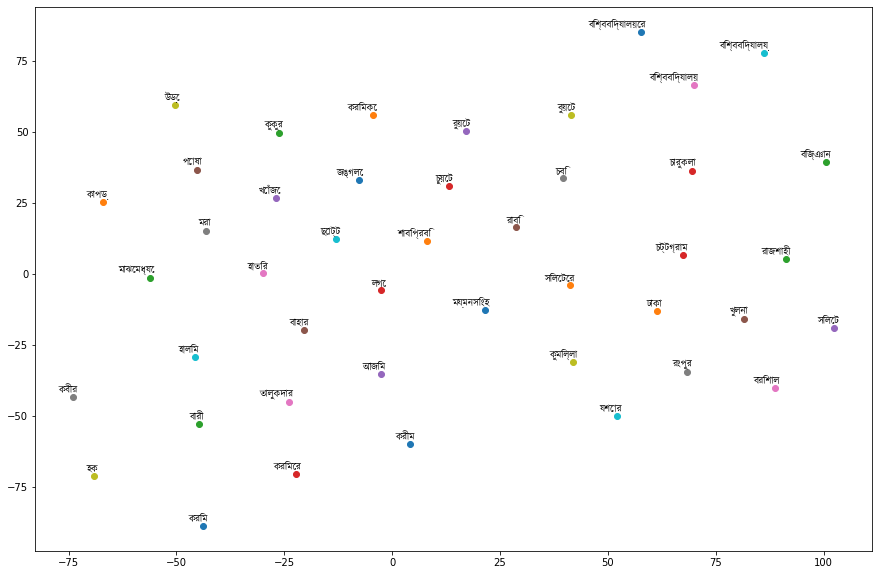

In [ ]:
from __future__ import print_function
from gensim.models import KeyedVectors
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

## To show bangla fonts
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
font_path = 'Kalpurush.ttf'
prop = fm.FontProperties(fname=font_path)
###

frequent_words = model.wv.index2entity[100:500]
frequent_words = words_to_print
# Limit number of tokens to be visualized
limit = len(frequent_words)
vector_dim = 100

# Getting tokens and vectors
words = frequent_words
embedding = np.array([])
i = 0
for w in words:
    embedding = np.append(embedding, model[w])

# Reshaping the embedding vector 
embedding = embedding.reshape(limit, vector_dim)

def plot_with_labels(low_dim_embs, labels, filename='tsne.png'):
    assert low_dim_embs.shape[0] >= len(labels), "More labels than embeddings"
    plt.figure(figsize=(15, 10))  # in inches
    for i, label in enumerate(labels):
        #print(label)
        x, y = low_dim_embs[i, :]
        plt.scatter(x, y)
        plt.annotate(label,
                 xy=(x, y),
                 xytext=(5, 2),
                 textcoords='offset points',
                 ha='right',
                 fontproperties=prop,
                 va='bottom')
   # os.chdir('/content/drive/Word_Embedding')
    #plt.savefig(filename)


# Creating the tsne plot [Warning: will take time]
tsne = TSNE(perplexity=30.0, n_components=2, init='pca', n_iter=5000)

low_dim_embedding = tsne.fit_transform(embedding)

# Finally plotting and saving the fig 
plot_with_labels(low_dim_embedding, words)


## For show in Embedding projector

In [ ]:
words = frequent_words

import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word in words:
  embeddings = word_to_vec_map[word]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

## Code to download file form colab

In [ ]:
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')